# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


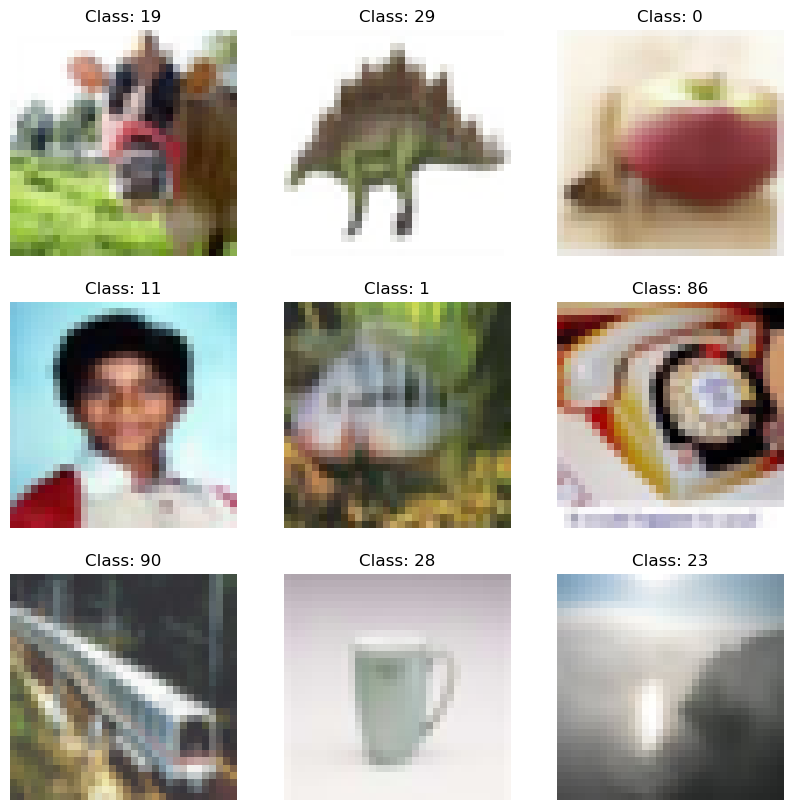

In [3]:
# Your code here
# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(set(y_train.flatten()))}")

# Show a few examples from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize the images to have pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")


Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()


2024-08-10 01:31:09.811944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 01:31:10.155157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 01:31:10.155277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 01:31:10.161010: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 01:31:10.161373: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [6]:
from keras import optimizers

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Brief explanation:
# Loss function: 'categorical_crossentropy' is suitable for multi-class classification problems, which is what we are dealing with in CIFAR-100.
# Optimizer: 'adam' is a popular choice for training deep learning models because it combines the best properties of the AdaGrad and RMSProp optimizers, which makes it suitable for large datasets and deep networks.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


2024-08-10 01:31:33.900521: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2024-08-10 01:31:38.498470: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20


2024-08-10 01:31:41.246505: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-08-10 01:31:41.748261: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-10 01:31:42.740410: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-10 01:31:42.920168: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f641250a2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-10 01:31:42.920252: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro T1000, Compute Capability 7.5
2024-08-10 01:31:42.952442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-10 01:31:43.246454: I ./tensorflow/compiler/jit/device_compiler.h:186]

1247/1250 [============================>.] - ETA: 0s - loss: 3.7964 - accuracy: 0.1276

2024-08-10 01:32:00.163183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-08-10 01:32:00.921652: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 25s 16ms/step - loss: 3.7951 - accuracy: 0.1277 - val_loss: 3.3062 - val_accuracy: 0.1970
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 3.0257 - accuracy: 0.2566 - val_loss: 2.8869 - val_accuracy: 0.2895
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.6873 - accuracy: 0.3250 - val_loss: 2.7208 - val_accuracy: 0.3201
Epoch 4/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.4472 - accuracy: 0.3692 - val_loss: 2.6429 - val_accuracy: 0.3379
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.2567 - accuracy: 0.4131 - val_loss: 2.6075 - val_accuracy: 0.3555
Epoch 6/20
1250/1250 [==============================] - 23s 19ms/step - loss: 2.1079 - accuracy: 0.4457 - val_loss: 2.5603 - val_accuracy: 0.3626
Epoch 7/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.9654 - accuracy: 0.4760 - val_loss: 2.6012 - val_accura

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [8]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Other metric: F1 Score
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


2024-08-10 01:38:05.047606: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 10ms/step
Test Accuracy: 0.3308
F1 Score: 0.3295


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

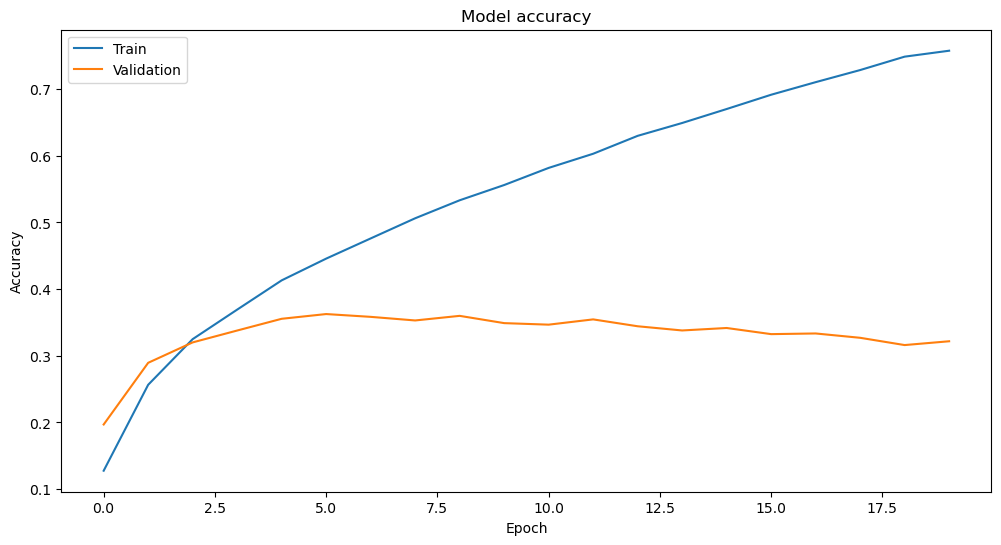

313/313 [==============================] - 3s 10ms/step


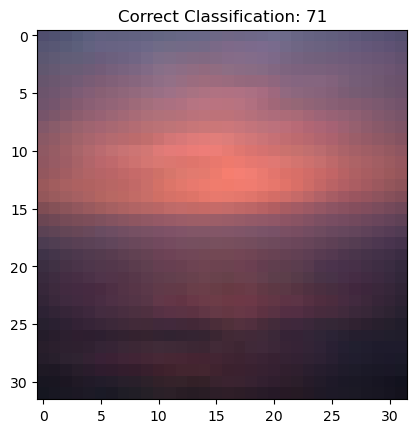

Classification probabilities for correct image:
 [1.24288397e-03 2.79688066e-07 2.25177939e-08 4.91944547e-08
 8.28987197e-07 1.04545888e-05 2.87607577e-10 3.46832003e-08
 1.22459334e-12 2.33588537e-04 2.11217138e-03 5.46714283e-08
 4.32682555e-06 2.47726444e-08 7.61394142e-11 1.15443481e-06
 5.62383866e-06 4.71141902e-07 5.21637412e-05 1.50659830e-07
 2.41079961e-05 3.41624286e-06 4.06901090e-04 7.58611187e-02
 3.22255311e-09 3.30946781e-03 1.30338398e-08 7.55655606e-07
 1.98724729e-06 5.23536698e-07 9.83421344e-10 2.02720244e-07
 8.23612481e-06 5.80619198e-05 1.36305169e-11 9.30339965e-08
 9.97870120e-10 7.27404768e-08 3.93993241e-11 5.10836981e-06
 9.51581374e-02 1.04996600e-09 1.42211617e-10 6.03996797e-10
 7.86284818e-06 4.32472547e-08 1.66783911e-06 1.17210857e-05
 9.94883903e-15 7.01480508e-02 1.48266654e-05 8.09526171e-08
 2.58686578e-06 1.43643625e-10 4.59532112e-06 1.44840205e-05
 1.41184735e-08 4.23595448e-05 4.23328483e-09 4.64450204e-05
 1.73358485e-01 1.43337747e-05 6.512

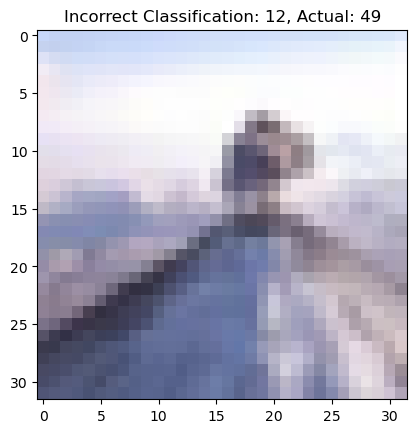

Classification probabilities for incorrect image:
 [6.64114076e-12 1.28539099e-07 9.35756452e-06 6.22031803e-04
 7.42543307e-07 1.57975194e-06 2.50195490e-06 7.36160800e-05
 3.75966920e-05 2.13588519e-05 7.72266873e-08 1.06713898e-03
 6.24136806e-01 3.74010689e-09 5.66859359e-09 8.96238780e-05
 1.03102686e-07 1.24018816e-05 5.62252353e-05 1.34665299e-07
 4.27521840e-08 2.97655475e-07 1.06654370e-05 4.85598430e-04
 7.18044757e-05 1.94843608e-07 2.43744967e-06 9.02427360e-04
 5.20443599e-08 6.22770385e-05 1.45703852e-01 9.89118689e-08
 8.20701025e-05 3.83367387e-06 2.01923525e-04 2.56564381e-04
 1.29571092e-07 1.09235571e-05 4.30175496e-05 9.56850417e-05
 1.69715809e-03 6.30325985e-07 6.45389780e-04 8.85896152e-05
 1.72403583e-03 4.58085196e-06 1.20593257e-04 7.80943574e-11
 3.36936274e-08 1.03980979e-04 1.62225988e-04 7.22883886e-09
 1.94586889e-08 1.35921474e-09 5.19628543e-07 4.13197000e-03
 8.43493417e-02 1.31212698e-06 9.05282427e-09 2.08853962e-05
 1.48689496e-05 1.84332745e-08 6.0

In [9]:
# Your code here
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predicting probabilities on the test set
predictions = model.predict(x_test)

# Selecting a correctly classified image
correct_idx = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))[0][0]

plt.imshow(x_test[correct_idx])
plt.title(f"Correct Classification: {np.argmax(predictions[correct_idx])}")
plt.show()

# Print model's classification probabilities for this image
print(f"Classification probabilities for correct image:\n {predictions[correct_idx]}")

# Selecting an incorrectly classified image
incorrect_idx = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0][0]

plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect Classification: {np.argmax(predictions[incorrect_idx])}, Actual: {np.argmax(y_test[incorrect_idx])}")
plt.show()

# Print model's classification probabilities for this image
print(f"Classification probabilities for incorrect image:\n {predictions[incorrect_idx]}")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [10]:
# Your code here
from keras.layers import Dropout

# Enhance the model with Dropout to prevent overfitting
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Re-train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/20


2024-08-10 01:39:34.234923: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 38s 26ms/step - loss: 4.2458 - accuracy: 0.0496 - val_loss: 3.8711 - val_accuracy: 0.1255
Epoch 2/20
1250/1250 [==============================] - 33s 26ms/step - loss: 3.8467 - accuracy: 0.1031 - val_loss: 3.5406 - val_accuracy: 0.1789
Epoch 3/20
1250/1250 [==============================] - 34s 27ms/step - loss: 3.6578 - accuracy: 0.1331 - val_loss: 3.3851 - val_accuracy: 0.2135
Epoch 4/20
1250/1250 [==============================] - 36s 28ms/step - loss: 3.5241 - accuracy: 0.1569 - val_loss: 3.2616 - val_accuracy: 0.2294
Epoch 5/20
1250/1250 [==============================] - 35s 28ms/step - loss: 3.4281 - accuracy: 0.1690 - val_loss: 3.1447 - val_accuracy: 0.2481
Epoch 6/20
1250/1250 [==============================] - 32s 26ms/step - loss: 3.3567 - accuracy: 0.1828 - val_loss: 3.0658 - val_accuracy: 0.2618
Epoch 7/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.2851 - accuracy: 0.1935 - val_loss: 2.9644 - val_accura

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20


2024-08-10 02:23:58.792068: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 25s 18ms/step - loss: 2.4777 - accuracy: 0.3471 - precision_1: 0.6892 - recall_1: 0.1717 - val_loss: 2.4852 - val_accuracy: 0.3721 - val_precision_1: 0.7802 - val_recall_1: 0.1445
Epoch 2/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.4467 - accuracy: 0.3480 - precision_1: 0.6997 - recall_1: 0.1724 - val_loss: 2.5193 - val_accuracy: 0.3655 - val_precision_1: 0.7763 - val_recall_1: 0.1468
Epoch 3/20
1250/1250 [==============================] - 23s 18ms/step - loss: 2.4588 - accuracy: 0.3492 - precision_1: 0.6905 - recall_1: 0.1705 - val_loss: 2.4678 - val_accuracy: 0.3696 - val_precision_1: 0.7773 - val_recall_1: 0.1532
Epoch 4/20
1250/1250 [==============================] - 22s 17ms/step - loss: 2.4278 - accuracy: 0.3562 - precision_1: 0.6985 - recall_1: 0.1771 - val_loss: 2.4751 - val_accuracy: 0.3710 - val_precision_1: 0.7716 - val_recall_1: 0.1466
Epoch 5/20
1250/1250 [==============================] - 22s 17ms/st

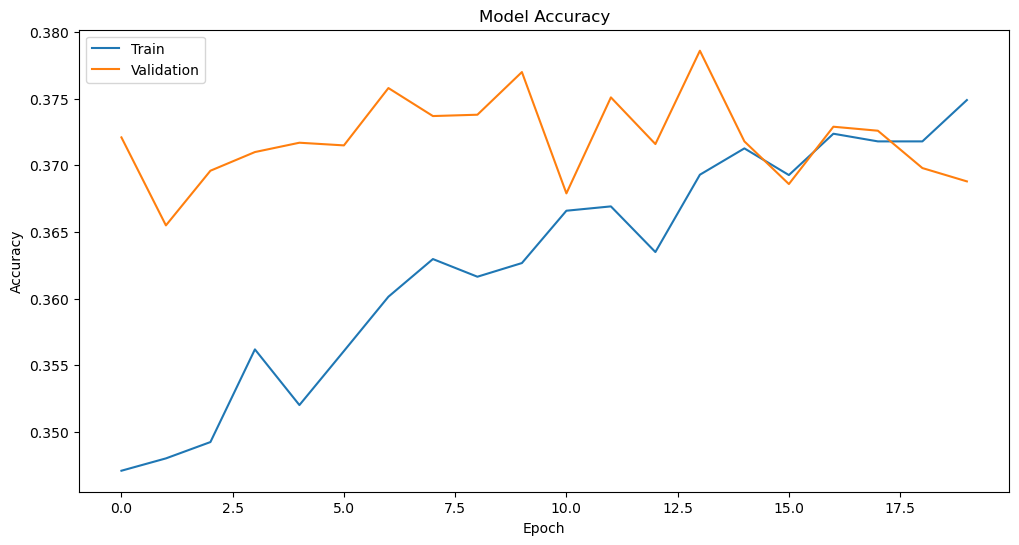

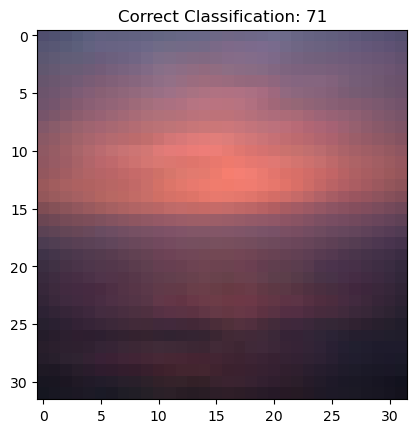

1/1 [==============================] - 0s 296ms/step
Classification probabilities for correct image:
 [[2.55780924e-10 1.64870770e-10 2.73871030e-11 1.08633047e-09
  1.81957616e-10 4.55292906e-07 1.26742317e-17 3.31220121e-12
  8.83111998e-16 2.11330735e-06 6.11905705e-07 1.69663866e-11
  3.99447998e-07 2.68508176e-12 1.37629450e-13 8.64484151e-10
  2.28555863e-09 3.15264516e-11 1.01018998e-07 1.50810253e-09
  4.52500232e-10 4.67797111e-15 2.26186376e-08 1.04259506e-01
  1.55493646e-13 6.31372086e-06 6.55809365e-11 2.43364079e-10
  3.82938515e-06 6.60958288e-10 1.93348115e-10 4.78749124e-11
  2.08205506e-07 5.00538590e-07 3.43882106e-12 9.17139086e-13
  4.81555108e-11 2.41174563e-11 8.92612373e-12 1.01270280e-05
  1.98972957e-05 2.06310832e-14 2.00560715e-14 6.57099838e-16
  1.89715436e-07 2.94813067e-12 2.72069201e-10 5.39117240e-09
  1.38242901e-18 5.72672812e-04 7.45519035e-10 7.91566146e-10
  6.08575825e-14 1.29553482e-18 2.65749645e-09 1.67376246e-08
  5.71015946e-08 1.37487604e-0

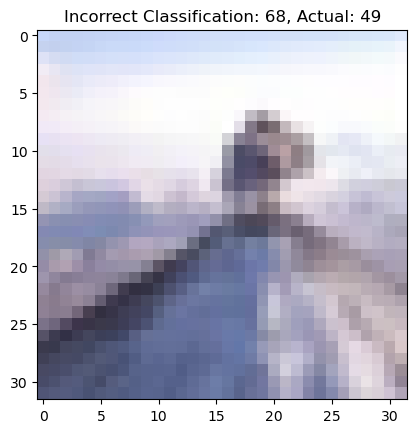

1/1 [==============================] - 0s 44ms/step
Classification probabilities for incorrect image:
 [[1.24683154e-07 5.56177554e-07 2.47974385e-05 3.47109977e-03
  7.42894830e-03 3.47468507e-04 4.65266967e-05 1.26341800e-03
  5.09996293e-03 4.45359998e-04 3.33125463e-05 3.34668221e-05
  1.08914599e-01 5.94046374e-04 1.01084093e-04 3.62410373e-03
  2.22341532e-05 3.22955102e-03 7.91457854e-03 1.50960346e-03
  7.88034667e-05 1.79971903e-04 3.33505450e-04 1.47816269e-02
  1.10878420e-04 4.53804911e-04 4.32237313e-04 5.52377990e-03
  6.12204531e-05 8.03191960e-03 2.10140981e-02 3.90749017e-04
  1.13369795e-04 4.96359949e-04 2.17011591e-04 2.56872263e-05
  6.27882400e-07 4.31003049e-03 2.07889639e-03 1.44002251e-02
  1.48483203e-03 2.24256102e-04 1.08001739e-04 6.57315184e-07
  3.72885577e-02 1.66463491e-04 2.19826447e-03 1.13137474e-04
  1.57952728e-03 1.03735037e-01 9.28345427e-04 4.76193200e-05
  8.82502718e-06 3.11946935e-16 6.19532002e-05 4.58634533e-02
  3.32127996e-02 2.36530046e-

In [16]:
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Re-compile the model with appropriate metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()]) 

# Re-train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val), shuffle=True)

# Evaluate the enhanced model
results = model.evaluate(x_test, y_test)

# Unpack the results
enhanced_test_loss = results[0]
enhanced_test_accuracy = results[1]
precision = results[2]
recall = results[3]

# F1 Score for enhanced model
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Enhanced Test Loss: {enhanced_test_loss:.4f}")
print(f"Enhanced Test Accuracy: {enhanced_test_accuracy:.4f}")
print(f"Enhanced Precision: {precision:.4f}")
print(f"Enhanced Recall: {recall:.4f}")
print(f"Enhanced F1 Score: {f1:.4f}")

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Selecting an image that was correctly classified
correct_idx = np.where(y_pred == y_true)[0][0]
plt.imshow(x_test[correct_idx])
plt.title(f"Correct Classification: {y_pred[correct_idx]}")
plt.show()

# Print model's classification probabilities for this image
correct_probs = model.predict(x_test[correct_idx:correct_idx+1])
print(f"Classification probabilities for correct image:\n {correct_probs}")

# Selecting an image that was incorrectly classified
incorrect_idx = np.where(y_pred != y_true)[0][0]
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect Classification: {y_pred[incorrect_idx]}, Actual: {y_true[incorrect_idx]}")
plt.show()

# Print model's classification probabilities for this image
incorrect_probs = model.predict(x_test[incorrect_idx:incorrect_idx+1])
print(f"Classification probabilities for incorrect image:\n {incorrect_probs}")


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance showed improvement after implementing Dropout layers, with a slight increase in accuracy, precision, recall, and F1 Score on the test set. This improvement is likely due to the Dropout layers, which helped reduce overfitting by preventing the model from relying too heavily on specific neurons during training.

Despite this progress, there is still room for further improvement. The model's accuracy and F1 Score indicate that it could benefit from additional enhancements, such as using data augmentation to increase training data diversity or employing transfer learning with a pre-trained model like ResNet or VGG.

Future techniques to explore include tuning hyperparameters (e.g., learning rate, dropout rate), experimenting with different architectures, or using ensemble methods to combine predictions from multiple models for better generalization. These approaches could potentially yield a more robust and accurate model for the CIFAR-100 dataset.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.